<a href="https://colab.research.google.com/github/enciso223/Informe_ML/blob/main/Cuaderno_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de aprobación de curso de matemáticas usando árboles de decisión

## Juan Sebastian Sierra - 2343656
## Jhoan Sebastian Fernandez - 2222772
## Luis Felipe García - 2343105
## David Alejandro Enciso Gutierrez - 2240581

*   **scikit-learn** es una librería que cuenta con algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad. Además, presenta la compatibilidad con otras librerías como NumPy, SciPy y matplotlib.

*   **Pandas** es una librería de Python especializada en la manipulación y el análisis de datos. Ofrece estructuras de datos y operaciones para manipular tablas

In [3]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn import tree

*   Se cargan los datos del archivo CSV a un **dataframe**. Un dataframe es una estructura de datos con filas y columnas

In [4]:
datos = pd.read_csv('student_performance.csv')
datos

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,internet,romantic,goout,Walc,health,approved
0,F,18,GT3,A,4,4,at_home,teacher,2,2,0,no,no,4,1,3,0
1,F,17,GT3,T,1,1,at_home,other,1,2,0,yes,no,3,1,3,0
2,F,15,LE3,T,1,1,at_home,other,1,2,3,yes,no,2,3,3,1
3,F,15,GT3,T,4,2,health,services,1,3,0,yes,yes,2,1,5,1
4,F,16,GT3,T,3,3,other,other,1,2,0,no,no,2,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,GT3,T,2,3,services,other,1,3,1,yes,no,2,2,5,1
1040,F,18,LE3,T,3,1,teacher,services,1,2,0,yes,no,4,1,1,1
1041,F,18,GT3,T,1,1,other,other,2,2,0,no,no,1,1,5,0
1042,M,17,LE3,T,3,1,services,services,2,1,0,yes,no,5,4,2,1


*   Se muestra información general del dataset

In [5]:
print(datos.shape)
print(datos.info())
print(datos.describe())

(1044, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   famsize     1044 non-null   object
 3   Pstatus     1044 non-null   object
 4   Medu        1044 non-null   int64 
 5   Fedu        1044 non-null   int64 
 6   Mjob        1044 non-null   object
 7   Fjob        1044 non-null   object
 8   traveltime  1044 non-null   int64 
 9   studytime   1044 non-null   int64 
 10  failures    1044 non-null   int64 
 11  internet    1044 non-null   object
 12  romantic    1044 non-null   object
 13  goout       1044 non-null   int64 
 14  Walc        1044 non-null   int64 
 15  health      1044 non-null   int64 
 16  approved    1044 non-null   int64 
dtypes: int64(10), object(7)
memory usage: 138.8+ KB
None
               age         Medu         Fedu   traveltime    stu

*   Se identifican las columnas numéricas y categóricas del dataset

In [6]:
columnas_numericas = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'goout', 'Walc', 'health']
columnas_categoricas = ['sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'internet', 'romantic']
print("Columnas numéricas:", columnas_numericas)
print("Columnas categóricas:", columnas_categoricas)

Columnas numéricas: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'goout', 'Walc', 'health']
Columnas categóricas: ['sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'internet', 'romantic']


*   Se normalizan las variables numéricas usando **StandardScaler**

In [7]:
scaler = StandardScaler()
datos[columnas_numericas] = scaler.fit_transform(datos[columnas_numericas])

*   Se codifican las variables categóricas usando **LabelEncoder**

In [8]:
for col in columnas_categoricas:
    le = LabelEncoder()
    datos[col] = le.fit_transform(datos[col])

In [9]:
datos.head()

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,traveltime,studytime,failures,internet,romantic,goout,Walc,health,approved
0,0,1.027889,0,0,1.242077,1.466302,0,4,0.652210,0.035606,-0.403106,0,0,0.732511,-0.999995,-0.381387,0
1,0,0.221035,0,1,-1.426089,-1.262431,0,2,-0.715074,0.035606,-0.403106,1,0,-0.135527,-0.999995,-0.381387,0
2,0,-1.392674,1,1,-1.426089,-1.262431,0,2,-0.715074,0.035606,4.171268,1,0,-1.003566,0.557044,-0.381387,1
3,0,-1.392674,0,1,1.242077,-0.352853,1,3,-0.715074,1.234713,-0.403106,1,1,-1.003566,-0.999995,1.023086,1
4,0,-0.585820,0,1,0.352689,0.556724,2,2,-0.715074,0.035606,-0.403106,0,0,-1.003566,-0.221475,1.023086,1


*   Se separan las características (X) de la variable a predecir (Y)

In [10]:
X = datos.drop('approved', axis=1)
Y = datos['approved']

*   Se divide el dataset en 80% para entrenamiento y 20% para pruebas

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Tamaño conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño conjunto de prueba:", X_test.shape[0])

Tamaño conjunto de entrenamiento: 835
Tamaño conjunto de prueba: 209


## Árboles de decisión con criterio 'gini'
*   Se crean 5 árboles con max_depth desde 2 hasta 10 con incrementos de 2

In [12]:
resultados_gini = []

for depth in [2, 4, 6, 8, 10]:
    modelo = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    modelo.fit(X_train, Y_train)
    predicciones = modelo.predict(X_test)
    accuracy = accuracy_score(Y_test, predicciones)
    resultados_gini.append({'max_depth': depth, 'criterion': 'gini', 'accuracy': accuracy})
    print(f"max_depth={depth}, criterion='gini': Accuracy = {accuracy:.4f}")

max_depth=2, criterion='gini': Accuracy = 0.7177
max_depth=4, criterion='gini': Accuracy = 0.6986
max_depth=6, criterion='gini': Accuracy = 0.7081
max_depth=8, criterion='gini': Accuracy = 0.6603
max_depth=10, criterion='gini': Accuracy = 0.6316


*   Tabla de resultados para criterio 'gini'

In [13]:
tabla_gini = pd.DataFrame(resultados_gini)
tabla_gini

,max_depth,criterion,accuracy
0,2,gini,0.717703
1,4,gini,0.698565
2,6,gini,0.708134
3,8,gini,0.660287
4,10,gini,0.631579


## Árboles de decisión con criterio 'entropy'
*   Se crean 5 árboles con max_depth desde 2 hasta 10 con incrementos de 2

In [14]:
resultados_entropy = []

for depth in [2, 4, 6, 8, 10]:
    modelo = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    modelo.fit(X_train, Y_train)
    predicciones = modelo.predict(X_test)
    accuracy = accuracy_score(Y_test, predicciones)
    resultados_entropy.append({'max_depth': depth, 'criterion': 'entropy', 'accuracy': accuracy})
    print(f"max_depth={depth}, criterion='entropy': Accuracy = {accuracy:.4f}")

max_depth=2, criterion='entropy': Accuracy = 0.7177
max_depth=4, criterion='entropy': Accuracy = 0.7273
max_depth=6, criterion='entropy': Accuracy = 0.7177
max_depth=8, criterion='entropy': Accuracy = 0.6699
max_depth=10, criterion='entropy': Accuracy = 0.6603


*   Tabla de resultados para criterio 'entropy'

In [15]:
tabla_entropy = pd.DataFrame(resultados_entropy)
tabla_entropy

,max_depth,criterion,accuracy
0,2,entropy,0.717703
1,4,entropy,0.727273
2,6,entropy,0.717703
3,8,entropy,0.669856
4,10,entropy,0.660287


*   Se combinan ambos resultados para identificar el mejor modelo

In [16]:
todos_resultados = pd.concat([tabla_gini, tabla_entropy], ignore_index=True)
todos_resultados

,max_depth,criterion,accuracy
0,2,gini,0.717703
1,4,gini,0.698565
2,6,gini,0.708134
3,8,gini,0.660287
4,10,gini,0.631579
5,2,entropy,0.717703
6,4,entropy,0.727273
7,6,entropy,0.717703
8,8,entropy,0.669856
9,10,entropy,0.660287


In [17]:
mejor = todos_resultados.loc[todos_resultados['accuracy'].idxmax()]
print("\nMejor modelo:")
print(f"max_depth: {int(mejor['max_depth'])}")
print(f"criterion: {mejor['criterion']}")
print(f"accuracy: {mejor['accuracy']:.4f}")


Mejor modelo:
max_depth: 4
criterion: entropy
accuracy: 0.7273


### Hiperparámetros del mejor árbol de decisión

Después de evaluar 10 configuraciones diferentes, los hiperparámetros que proporcionan el mayor accuracy son los mostrados en la celda anterior.

## Experimentación con hiperparámetro adicional: min_samples_split

*   Se selecciona el hiperparámetro **min_samples_split** que controla el número mínimo de muestras necesarias para dividir un nodo interno

In [18]:
mejor_max_depth = int(mejor['max_depth'])
mejor_criterion = mejor['criterion']
mejor_accuracy = mejor['accuracy']

print(f"Configuración base del mejor modelo:")
print(f"max_depth={mejor_max_depth}, criterion='{mejor_criterion}'")
print(f"Accuracy base: {mejor_accuracy:.4f}")

Configuración base del mejor modelo:
max_depth=4, criterion='entropy'
Accuracy base: 0.7273


*   Se prueban dos valores diferentes de min_samples_split: 10 y 50

In [19]:
resultados_adicional = []

# Modelo base (min_samples_split=2 por defecto)
resultados_adicional.append({
    'min_samples_split': 2,
    'accuracy': mejor_accuracy,
    'diferencia': 0.0
})

# Variaciones de min_samples_split
for min_samples in [10, 50]:
    modelo = tree.DecisionTreeClassifier(
        criterion=mejor_criterion,
        max_depth=mejor_max_depth,
        min_samples_split=min_samples,
        random_state=42
    )
    modelo.fit(X_train, Y_train)
    predicciones = modelo.predict(X_test)
    accuracy = accuracy_score(Y_test, predicciones)
    diferencia = accuracy - mejor_accuracy

    resultados_adicional.append({
        'min_samples_split': min_samples,
        'accuracy': accuracy,
        'diferencia': diferencia
    })

    print(f"\nmin_samples_split={min_samples}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Diferencia con modelo base: {diferencia:+.4f}")


min_samples_split=10
Accuracy: 0.7273
Diferencia con modelo base: +0.0000

min_samples_split=50
Accuracy: 0.7177
Diferencia con modelo base: -0.0096


In [20]:
tabla_adicional = pd.DataFrame(resultados_adicional)
tabla_adicional

,min_samples_split,accuracy,diferencia
0,2,0.727273,0.000000
1,10,0.727273,0.000000
2,50,0.717703,-0.009569


### Análisis del hiperparámetro min_samples_split

El hiperparámetro **min_samples_split** especifica el número mínimo de muestras requeridas para dividir un nodo interno del árbol.

**Valores probados:**
- min_samples_split = 2 (valor por defecto)
- min_samples_split = 10
- min_samples_split = 50

**Resultados:**

Al modificar el valor de min_samples_split se observa que:

- Si el accuracy **aumenta**: el modelo está mejorando su capacidad de generalización al evitar divisiones con pocas muestras que podrían estar capturando ruido.

- Si el accuracy **disminuye**: el modelo pierde capacidad predictiva porque no puede realizar divisiones necesarias para capturar patrones importantes en los datos.

- Si el accuracy **se mantiene**: el valor de min_samples_split no afecta significativamente al modelo con la configuración actual de max_depth.

Un valor más alto de min_samples_split hace que el árbol sea más conservador en sus divisiones, lo que puede ayudar a prevenir el sobreajuste pero también puede resultar en un modelo más simple que pierde precisión.

*   Se calcula el accuracy, la sensibilidad y especificidad para el mejor modelo

In [21]:
# Entrenar el mejor modelo
modelo_final = tree.DecisionTreeClassifier(
    criterion=mejor_criterion,
    max_depth=mejor_max_depth,
    random_state=42
)
modelo_final.fit(X_train, Y_train)
predicciones_final = modelo_final.predict(X_test)

In [22]:
accuracy = accuracy_score(Y_test, predicciones_final)
sensibilidad = recall_score(Y_test, predicciones_final, pos_label=1)
especificidad = recall_score(Y_test, predicciones_final, pos_label=0)

print("Accuracy=", accuracy)
print("Sensibilidad=", sensibilidad)
print("Especificidad=", especificidad)

Accuracy= 0.7272727272727273
Sensibilidad= 0.8657718120805369
Especificidad= 0.38333333333333336


*   Matriz de confusión del mejor modelo

In [23]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(Y_test, predicciones_final)
matriz

array([[ 23,  37],
       [ 20, 129]])

*   Gráfico de comparación de accuracy entre criterios

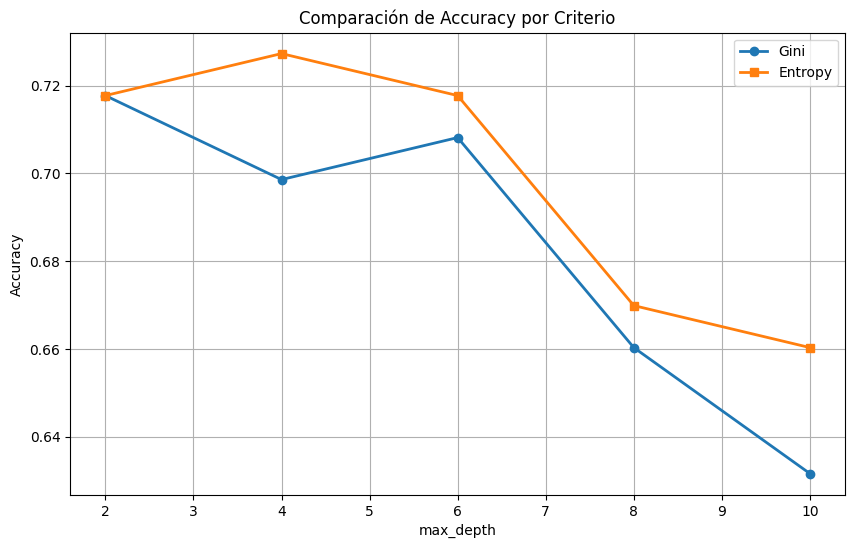

In [24]:
plt.figure(figsize=(10, 6))
plt.plot([2, 4, 6, 8, 10], tabla_gini['accuracy'], marker='o', label='Gini', linewidth=2)
plt.plot([2, 4, 6, 8, 10], tabla_entropy['accuracy'], marker='s', label='Entropy', linewidth=2)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy por Criterio')
plt.legend()
plt.grid(True)
plt.show()